# UTS Clustering Image Segmentation
### Nama : Wanda Febrina Cahya
### No / Kelas : 29 / TI-3E
### NIM :2141720001

# Segmentasi Gambar dengan Clustering

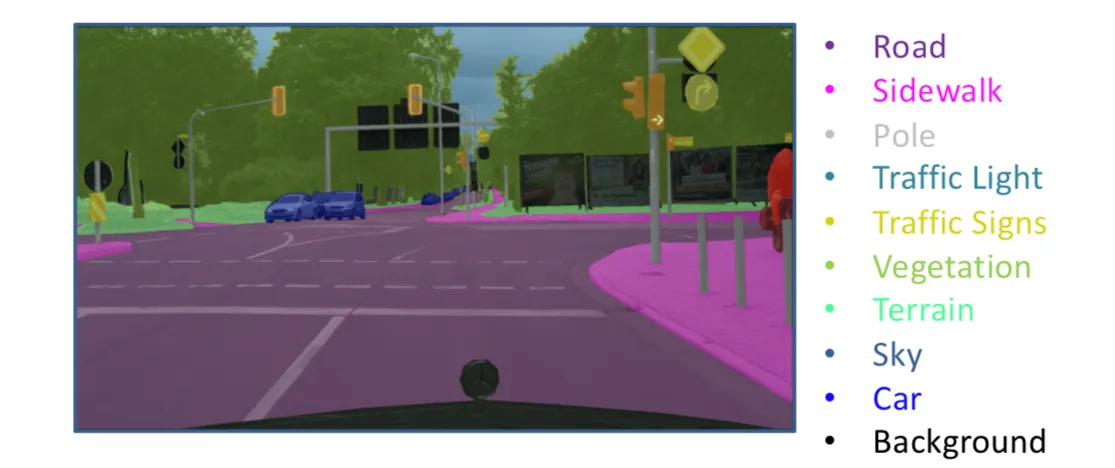

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

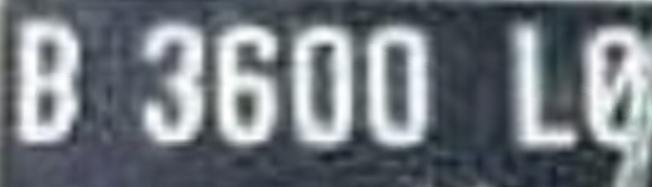

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [2]:
# Mengimpor drive dari google.colab untuk mengakses Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [3]:
# For Data Manipulation
import numpy as np
import os
import random

# For Visualization
import cv2
import matplotlib.pyplot as plt

# For Preprocessing
from sklearn.decomposition import PCA

# For Modelling
from sklearn.cluster import KMeans, MiniBatchKMeans

# Read Image

In [21]:
# Menentukan direktori dataset yang digunakan
dataset_dir = '/content/drive/MyDrive/dummy'

# Membuat daftar path file gambar dengan menggabungkan direktori dataset
selected_images = [os.path.join(dataset_dir, file) for file in os.listdir(dataset_dir)]

# Mengurutkan gambar berdasarkan nama file untuk memastikan urutan yang konsisten
selected_images.sort(key=lambda x: os.path.basename(x))

In [22]:
# Ambil hanya 5 nomor plat teratas
first_5_license = selected_images[:5]

# KMeans Modelling

In [23]:
# Fungsi kmeans_segmentation digunakan untuk melakukan segmentasi citra menggunakan algoritma K-Means
def kmeans_segmentation(image, k):
    # Jika citra berwarna
    if len(image.shape) == 3:
        pixels = image.reshape((-1, 3)) # Melakukan reshape citra ke format 2D (baris x kolom) untuk citra berwarna
    # Jika citra grayscale
    elif len(image.shape) == 2:
        pixels = image.reshape((-1, 1)) # Melakukan reshape citra ke format 2D (baris x kolom) untuk citra grayscale
    else:
        raise ValueError("Bentuk citra tidak didukung") # Melempar pengecualian jika bentuk citra tidak didukung

    kmeans = KMeans(n_clusters=k, n_init=100) # Membuat objek KMeans dengan jumlah cluster (k) dan iterasi inisialisasi sebanyak 100
    kmeans.fit(pixels)  # Melakukan pelatihan model K-Means pada data piksel citra

    # Menggunakan dimensi citra asli
    segmented_image = kmeans.labels_.reshape(image.shape[:2])  # Mereshape hasil segmentasi ke bentuk asli citra
    return segmented_image # Mengembalikan citra yang telah disegmentasi

# Display the Images

In [24]:
def show_images(images, titles, figsize=(15, 7)):
    # Membuat sebuah figure dengan ukuran yang ditentukan
    plt.figure(figsize=figsize)

    for i in range(len(images)):
         # Membuat subplot di dalam figure untuk setiap gambar
        plt.subplot(1, len(images), i+1)
        
        # Menampilkan gambar
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Print the Image

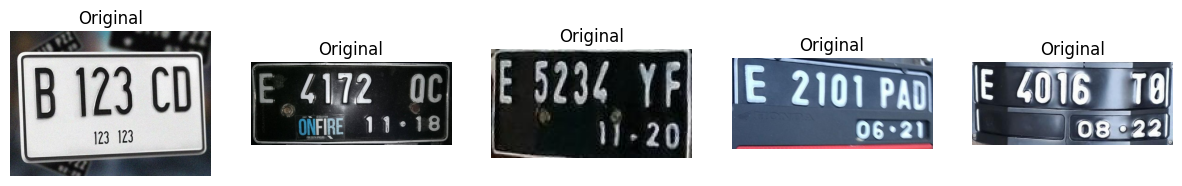

In [25]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in first_5_license]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original') # Menambahkan nomor gambar ke judul
    ax.axis('off')
plt.show()

In [41]:
# Loop melalui gambar-gambar dalam daftar first_5_license
for i, img_path in enumerate(first_5_license):
    img = cv2.imread(img_path)
    h, w, ch = img.shape
    
    # Menampilkan informasi tentang setiap gambar
    print(f"Data ke-{i+1}") # Menampilkan nomor gambar yang sedang diproses
    print("Height (h):", h) # Menampilkan tinggi citra (jumlah baris)
    print("Width (w):", w) # Menampilkan lebar citra (jumlah kolom)
    print("Number of Channels (ch):", ch) # Menampilkan jumlah saluran citra (3 untuk warna, 1 untuk grayscale)

Data ke-1
Height (h): 738
Width (w): 1023
Number of Channels (ch): 3
Data ke-2
Height (h): 511
Width (w): 1231
Number of Channels (ch): 3
Data ke-3
Height (h): 83
Width (w): 153
Number of Channels (ch): 3
Data ke-4
Height (h): 303
Width (w): 670
Number of Channels (ch): 3
Data ke-5
Height (h): 179
Width (w): 432
Number of Channels (ch): 3


In [39]:
# Loop melalui gambar-gambar dalam daftar first_5_license
for i, img_path in enumerate(first_5_license):
    img = cv2.imread(img_path)
    h, w, ch = img.shape

    data = img / 255.0 # Normalisasi data citra
    data = data.reshape(h * w, ch) # Mereshape data citra untuk mempersiapkannya untuk pemrosesan lebih lanjut

    # Menampilkan bentuk 'data' yang telah dihasilkan dalam setiap iterasi
    print(f"Shape of 'data' ke-{i+1}:", data.shape)

Shape of 'data' ke-1: (754974, 3)
Shape of 'data' ke-2: (629041, 3)
Shape of 'data' ke-3: (12699, 3)
Shape of 'data' ke-4: (203010, 3)
Shape of 'data' ke-5: (77328, 3)


In [42]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Memilih subset acak dari data jika tidak ada warna yang diberikan
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    # Membuat sebuah subplot dengan dua bagian (2 grafik) dalam satu gambar
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    
    # Plot scatter plot Red vs. Green
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    # Plot scatter plot Red vs. Blue
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    # Menambahkan judul ke keseluruhan gambar
    fig.suptitle(title, size=14)

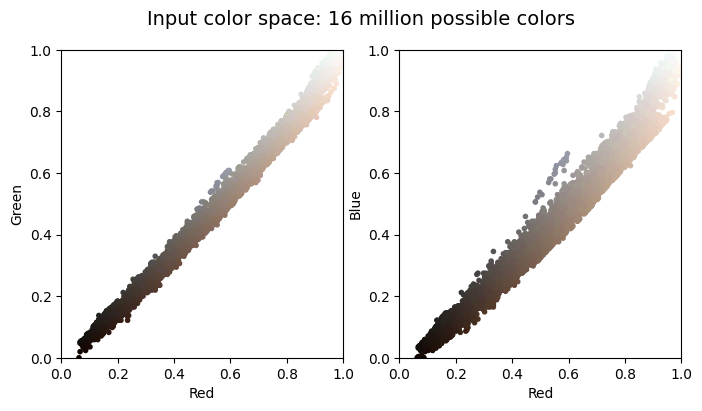

In [43]:
# Menampilkan scatter plot data citra asli
plot_pixels(data, title='Input color space: 16 million possible colors')

In [26]:
# Pra-pemrosesan: Reduksi dimensi menggunakan PCA
pca = PCA(n_components=3)
reduced_images = [pca.fit_transform(img.reshape((-1, 3))).reshape(img.shape) for img in original_images]

# Segmented Image

In [27]:
# Segmentasi citra dengan K-Means setelah PCA
segmented_images_pca = [kmeans_segmentation(img, 2) for img in reduced_images]

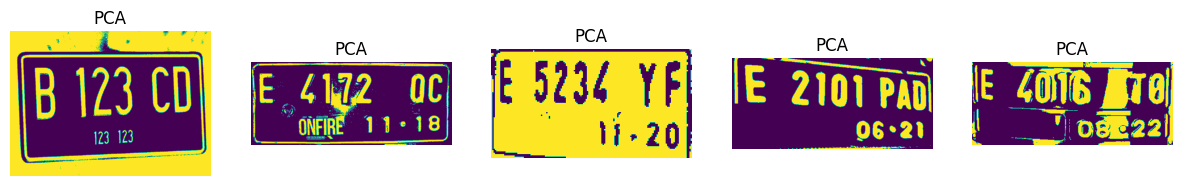

In [28]:
# Menampilkan citra hasil segmentasi setelah PCA
show_images(segmented_images_pca,['PCA']*len(segmented_images_pca))